# Tuning a sensing dot

<pieter.eendebak@gmail.com>

In this notebook we show how to tune a sensing dot to a sensitive point. We assume the dot is controlleted by 3 gates: a single plunger gate and and two barrier gates.

First we load a station

In [1]:
%matplotlib inline
import os
import users.eendebakpt
startfile = os.path.join(os.path.split(users.eendebakpt.__file__)[0], 'start8dot.py')
exec(open(startfile, 'rt').read())

gv={'B0': 100.0, 'B1': -255.0, 'B2': -330.0, 'B3': 100.0, 'B4': 100.0, 'B5': 100.0, 'B6': 100.0, 'B7': 100.0, 'B8': 100.0, 'D0': -230.0, 'O1': 0.0, 'O3': 0.0, 'O5': 0.0, 'P1': 100.0, 'P2': -110.07858396276811, 'P3': -84.992751964598938, 'P4': 100.0, 'P5': 100.0, 'P6': 100.00762951094839, 'P7': 100.00762951094839, 'P8': 100.0, 'X1': 15.0, 'X2': 51.0, 'Y0': -250.0, 'Y1': -375.0, 'Y2': -405.0, 'Y3': -520.0, 'phase': 0.0}
gates.resetgates(gv,gv, verbose=0)

Windows foundInitialized IVVI-rack in 0.07s
Connected to: KEITHLEY INSTRUMENTS INC. 2000 (serial:4045453, firmware:B01  /A02) in 0.10s
Connected to: KEITHLEY INSTRUMENTS INC. 2000 (serial:1264625, firmware:A20  /A02) in 0.06s
Connected to: TEKTRONIX AWG5014 (serial:B010188, firmware:SCPI:99.0 FW:3.3.182.755) in 0.12s
Connected to: TEKTRONIX AWG5014 (serial:B010106, firmware:SCPI:99.0 FW:3.1.141.647) in 0.18s
Connected to: Rohde&Schwarz SMB100A (serial:1406.6000k02/106309, firmware:3.0.13.0-2.20.382.35) in 0.02s
connected to fridge: mc 53.6 [mK] at 14-03-18 10:42:11
initialized XLD8dot
started calibration master


The sensing dot is defined by the `sensingdot_t` strucuture. The main arguments are the gates to control the dot and the instrument used to read the current through the dot. The code also works for fast readout (e.g. with RF), but the RF readout should be tuned beforehand.

In [7]:
sd=qtt.structures.sensingdot_t(['Y0', 'X1', 'Y1'], station=station, index=1, minstrument=(station.digitizer, 1))
print(sd)

sd gates: Y0, X1, Y1


# Basic checks

First we check that we have a dot defined by making a barrier-barrier scan. This scan only needs to be done once or when the system is not functioning properly.

`sensing dot sd gates: Y0, X1, Y1: performing barrier-barrier scan
DataSet:
   location = '2018-03-14/10-42-42_qtt_scan2D'
   <Type>   | <array_id>          | <array.name>        | <array.shape>
   Measured | digitizer_channel_1 | digitizer_channel_1 | (60, 60)
   Setpoint | Y0                  | Y0                  | (60,)
   Setpoint | Y1                  | Y1                  | (60, 60)


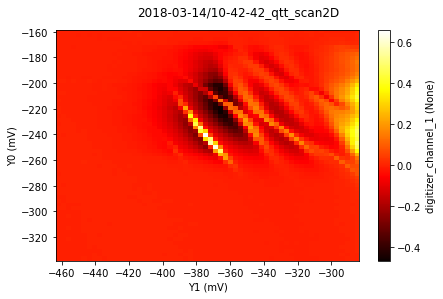

In [3]:
ds=sd.scan2D(ds=90, fig=100, stepsize=4., verbose=0)
print(ds)

# Automatic plunger calibration

The most sensitive part of the sensing dot is the plunger calibration. We calibrate this by making a 1D plunger scan and analysing the Coulomb peaks.

sensingdot_t: autotune complete: value 18.7 [mV]


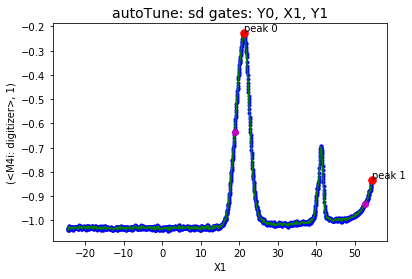

In [4]:
plungervalue, dataset = sd.fastTune(fig=200)

We have found a good Coulomb peak that can be used for sensing. The plungervalue is at the position of half-height on the left of the main peak is given by `plungervalue`. The detected peaks are stored in `sd.goodpeaks`.

In [5]:
print(sd.goodpeaks[0])

{'p': 1075, 'x': 21.290724119600114, 'y': -0.22793701171875, 'gaussfit': array([      144.056,        22.218, -74289121.491]), 'halfvaluelow': -0.63338573608398441, 'height': 0.81089744873046876, 'valid': 1, 'lowvalue': -1.0388344604492188, 'type': 'peak', 'phalf0': 1015, 'phalfl': None, 'indlocal': range(160, 1075), 'xhalfl': 18.747484760607783, 'xfoot': 16.83929856711743, 'yhalfl': -0.6355261230468756, 'pbottomlow': 959, 'pbottom': 980, 'pbottoml': 980, 'xbottom': 17.242719804605507, 'xbottoml': 17.242719804605507, 'vbottom': -0.92364990234375, 'ybottoml': -0.92364990234375, 'score': 1.1093033796349248, 'slope': 0.22611322194339117, 'heightscore': 0.89987918779906506, 'scorerelative': 1.4348433638937708, 'noisefactor': 0.9999280126696406}


# Optimizing the sensing dot

Optimizing the sensing dot is something that requires some experience and knowledge of the sample. It is also a balance between sensitivity (sharpnees of the peak) and range (width and height of the peak). However, a general rule of thumb is that the sensing dot peaks best when it is symmetric (e.g. the detuning between the two barriers is zero). To determine the optimal detuning one can use the `detuning_scan` function.

detuning_scan: iteration 0: detuning -7.500
sensingdot_t: autotune complete: value 16.8 [mV]
detuning_scan: iteration 1: detuning -5.000
sensingdot_t: autotune complete: value 17.0 [mV]
detuning_scan: iteration 2: detuning -2.500
sensingdot_t: autotune complete: value 17.8 [mV]
detuning_scan: iteration 3: detuning 0.000
sensingdot_t: autotune complete: value 15.1 [mV]
detuning_scan: iteration 4: detuning 2.500
sensingdot_t: autotune complete: value 15.5 [mV]
detuning_scan: iteration 5: detuning 5.000
sensingdot_t: autotune complete: value 16.1 [mV]
detuning_scan: iteration 6: detuning 7.500
sensingdot_t: autotune complete: value 16.9 [mV]
detuning_scan: best 4: detuning 2.500


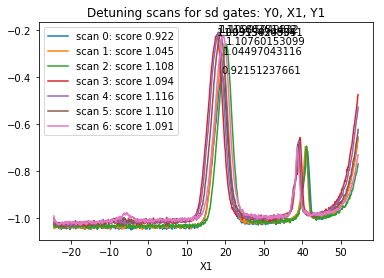

In [8]:
optimal, results = sd.detuning_scan(nsteps=7, stepsize=3.5, fig=100)

# Calibration of RF readout

...